In [2]:
###importing all dependancies
import numpy as np
import pandas as pd
from pathlib import Path
import requests
import time
from dotenv import load_dotenv
import os
import pandas as pd
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot
import matplotlib.pyplot as plt


In [3]:
#reading in the DF
df=pd.read_csv(Path('../resources/Crime_Data_from_2020_to_Present.csv'))

In [4]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [5]:
#codifying violent and non violent crimes
options = [110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926, 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 763, 928, 930]
df['is_violent'] = df['Crm Cd'].isin(options)

In [6]:
#df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%Y-%m-%d')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

In [7]:
for index, value in enumerate(df.columns):
    print (index, value)

0 DR_NO
1 Date Rptd
2 DATE OCC
3 TIME OCC
4 AREA
5 AREA NAME
6 Rpt Dist No
7 Part 1-2
8 Crm Cd
9 Crm Cd Desc
10 Mocodes
11 Vict Age
12 Vict Sex
13 Vict Descent
14 Premis Cd
15 Premis Desc
16 Weapon Used Cd
17 Weapon Desc
18 Status
19 Status Desc
20 Crm Cd 1
21 Crm Cd 2
22 Crm Cd 3
23 Crm Cd 4
24 LOCATION
25 Cross Street
26 LAT
27 LON
28 is_violent


In [8]:
df["month"]=df["DATE OCC"].dt.month

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,is_violent,month
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,True,1
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,True,1
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,False,2
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,False,1
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,False,1


In [9]:
select_columns=["DATE OCC", "month", "is_violent"]

df = df[select_columns]

df.head()

,DATE OCC,month,is_violent
0,2020-01-08,1,True
1,2020-01-01,1,True
2,2020-02-13,2,False
3,2020-01-01,1,False
4,2020-01-01,1,False


In [10]:
df["DATE OCC"].unique()

<DatetimeArray>
['2020-01-08 00:00:00', '2020-01-01 00:00:00', '2020-02-13 00:00:00',
 '2020-01-02 00:00:00', '2020-01-04 00:00:00', '2020-05-26 00:00:00',
 '2020-01-05 00:00:00', '2020-01-07 00:00:00', '2020-11-30 00:00:00',
 '2020-11-28 00:00:00',
 ...
 '2023-06-29 00:00:00', '2023-02-25 00:00:00', '2023-05-28 00:00:00',
 '2023-02-21 00:00:00', '2023-01-26 00:00:00', '2023-01-14 00:00:00',
 '2023-04-03 00:00:00', '2023-04-26 00:00:00', '2023-03-16 00:00:00',
 '2023-05-07 00:00:00']
Length: 1280, dtype: datetime64[ns]

In [11]:
df.columns=["date","month","is_violent"]

df.head()

,date,month,is_violent
0,2020-01-08,1,True
1,2020-01-01,1,True
2,2020-02-13,2,False
3,2020-01-01,1,False
4,2020-01-01,1,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752911 entries, 0 to 752910
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        752911 non-null  datetime64[ns]
 1   month       752911 non-null  int32         
 2   is_violent  752911 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int32(1)
memory usage: 9.3 MB


In [13]:
df["year"]=df["date"].dt.year

df.head()

,date,month,is_violent,year
0,2020-01-08,1,True,2020
1,2020-01-01,1,True,2020
2,2020-02-13,2,False,2020
3,2020-01-01,1,False,2020
4,2020-01-01,1,False,2020


In [14]:
grouped_df=df.groupby(["year","month","is_violent"]).size().unstack(fill_value=0)

grouped_df.columns=["false_count","true_count"]

grouped_df.reset_index(inplace=True)

grouped_df.sort_values(["year","month"],ascending=True, inplace = True)

grouped_df.head()

,year,month,false_count,true_count
0,2020,1,12931,5533
1,2020,2,12055,5194
2,2020,3,11177,4971
3,2020,4,10940,4731
4,2020,5,11861,5334


In [15]:
grouped_df["day"]=1

grouped_df["date"]=pd.to_datetime(grouped_df[["year","month","day"]])

grouped_df.head()
grouped_df.tail()

,year,month,false_count,true_count,day,date
38,2023,3,13399,5395,1,2023-03-01
39,2023,4,12875,5549,1,2023-04-01
40,2023,5,12447,5719,1,2023-05-01
41,2023,6,11301,5506,1,2023-06-01
42,2023,7,630,433,1,2023-07-01


In [16]:
grouped_df.set_index("date",inplace=True)
grouped_df

,year,month,false_count,true_count,day
date,,,,,
2020-01-01,2020,1,12931,5533,1
2020-02-01,2020,2,12055,5194,1
2020-03-01,2020,3,11177,4971,1
2020-04-01,2020,4,10940,4731,1
2020-05-01,2020,5,11861,5334,1
2020-06-01,2020,6,11602,5416,1
2020-07-01,2020,7,11591,5507,1
2020-08-01,2020,8,11009,5842,1
2020-09-01,2020,9,10262,5358,1


<Axes: xlabel='date'>

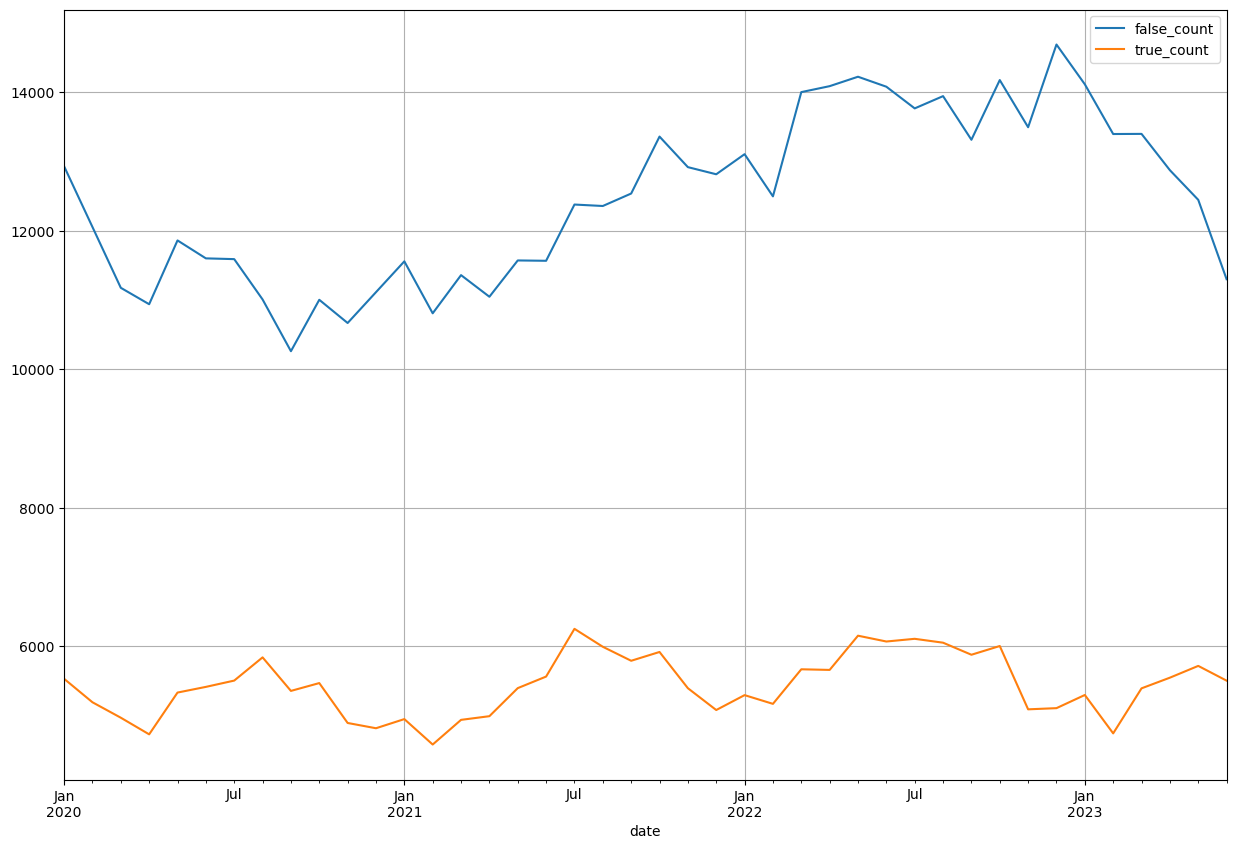

In [51]:
grouped_df=grouped_df.loc["2020-01-01":"2023-06-01"]

grouped_df.tail()
grouped_df.plot(
    y=["false_count","true_count"],
    figsize=(15,10),
    grid=True,
)

In [90]:
#grouped_df["avg_violent"]=grouped_df.groupby("month")["true_count"].median()
groupe_month_df=grouped_df.groupby("month")[["true_count","false_count"]].mean()
#grouped_df.head()
groupe_month_df

,true_count,false_count
month,,
1,5270.000000,12927.750000
2,4923.500000,12189.500000
3,5244.000000,12484.500000
4,5233.500000,12237.750000
5,5651.500000,12526.000000
6,5639.500000,12137.500000
7,5957.000000,12579.000000
8,5963.666667,12437.000000
9,5677.000000,12038.000000


<Axes: xlabel='month'>

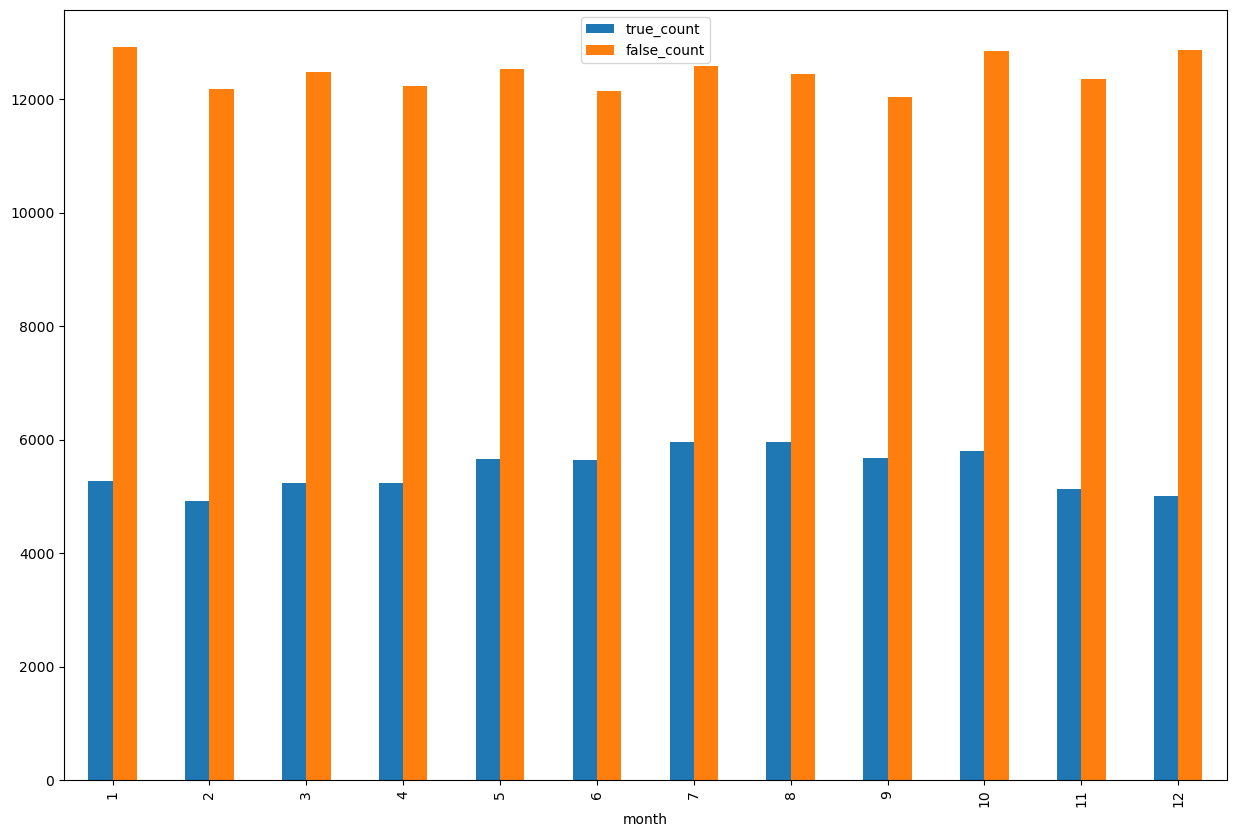

In [94]:
groupe_month_df.plot(kind='bar',figsize=(15,10)

#, x="month"

In [47]:
#⬛️⬛️⬛️⬛️⬛️⬛️⬛️⬜️⬜️⬜️⬜️⬜️⬛️⬜️⬜️⬜️⬜️⬜️⬛️⬛️⬛️⬛️⬛️⬛️⬛️
#⬛️⬜️⬜️⬜️⬜️⬜️⬛️⬜️⬛️⬛️⬛️⬛️⬛️⬛️⬜️⬛️⬛️⬜️⬛️⬜️⬜️⬜️⬜️⬜️⬛️
#⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬛️⬜️⬛️⬜️⬛️⬜️⬜️⬛️⬜️⬛️⬛️⬛️⬜️⬛️
#⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬜️⬜️⬛️⬜️⬛️⬛️⬜️⬛️⬛️⬜️⬜️⬛️⬜️⬛️⬛️⬛️⬜️⬛️
#⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬜️⬛️⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬜️⬜️⬛️⬜️⬛️⬛️⬛️⬜️⬛️
#⬛️⬜️⬜️⬜️⬜️⬜️⬛️⬜️⬛️⬜️⬛️⬜️⬜️⬜️⬜️⬛️⬜️⬜️⬛️⬜️⬜️⬜️⬜️⬜️⬛️
#⬛️⬛️⬛️⬛️⬛️⬛️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬜⬛️⬛️⬛️⬛️⬛️⬛️⬛️
#⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬛️⬜️⬛️⬜️⬛️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
#⬛️⬛️⬜️⬛️⬜️⬜️⬛️⬛️⬜️⬜️⬜️⬛️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬛️⬜️
#⬜️⬛️⬜️⬜️⬜️⬛️⬜️⬜️⬜️⬛️⬜️⬛️⬜️⬛️⬜️⬜️⬛️⬜️⬛️⬜️⬛️⬜️⬜️⬛️⬜️
#⬜️⬛️⬛️⬛️⬜️⬛️⬛️⬜️⬜️⬜️⬜️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬛️⬜️⬜️
#⬜️⬛️⬜️⬜️⬛️⬛️⬜️⬛️⬜️⬛️⬛️⬜️⬛️⬛️⬜️⬜️⬜️⬛️⬛️⬛️⬛️⬜️⬜️⬜️⬛️
#⬜️⬜️⬜️⬛️⬛️⬜️⬛️⬛️⬜️⬜️⬛️⬜️⬜️⬜️⬛️⬜️⬜️⬜️⬜️⬛️⬜️⬜️⬛️⬛️⬛️
#⬜️⬛️⬛️⬜️⬛️⬜️⬜️⬛️⬜️⬛️⬜️⬜⬛️⬜️⬛️⬛️⬜️⬜️⬜️⬛️⬛️⬜️⬛️⬛️⬜️
#⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬛️⬛️⬛️⬛️⬜️⬜️⬜️⬛️⬜️⬛️⬛️⬜️⬜️⬜️
#⬜️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬛️⬜️⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬛️⬛️⬛️⬜️⬜️⬜️⬜️⬜️
#⬛️⬛️⬜️⬛️⬛️⬛️⬛️⬛️⬜️⬛️⬜️⬜️⬜️⬜️⬜️⬜️⬛️⬛️⬛️⬛️⬛️⬜️⬜️⬛️⬛️
#⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬛️⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬛️⬜️⬜️⬜️⬛️⬜️⬜️⬜️⬜️
#⬛️⬛️⬛️⬛️⬛️⬛️⬛️⬜️⬛️⬛️⬜️⬜️⬜️⬛️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬛️⬜️⬛️⬛️
#⬛️⬜️⬜️⬜️⬜️⬜️⬛️⬜️⬜️⬛️⬛️⬛️⬛️⬜️⬛️⬜️⬛️⬜️⬜️⬜️⬛️⬛️⬛️⬛️⬛️
#⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬜️⬜️⬛️⬜️⬛️⬜️⬜️⬛️⬜️⬛️⬛️⬛️⬛️⬛️⬜️⬛️⬛️⬜️
#⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬛️⬜️⬛️⬜️⬜️⬛️⬜️⬛️⬛️⬛️⬜️⬜️⬜️⬜️
#⬛️⬜️⬛️⬛️⬛️⬜️⬛️⬜️⬜️⬜️⬛️⬛️⬜️⬜️⬜️⬛️⬜️⬛️⬜️⬛️⬜️⬛️⬛️⬜️⬛️
#⬛️⬜️⬜️⬜️⬜️⬜️⬛️⬜️⬛️⬜️⬛️⬛️⬜️⬛️⬜️⬜️⬜️⬛️⬜️⬜️⬜️⬛️⬜️⬛️⬛️
#⬛️⬛️⬛️⬛️⬛️⬛️⬛️⬜️⬛️⬜️⬛️⬜️⬜️⬛️⬜️⬛️⬛️⬛️⬜️⬜️⬛️⬛️⬜️⬛️⬛️